In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
import os
plt.rcParams["figure.figsize"] = (20, 8)

# Load Data 
* For more details on dataset overview visit 
https://biaowang.tech/xjtu-sy-bearing-datasets/

Text(0.5, 1.0, 'Bearing1_5')

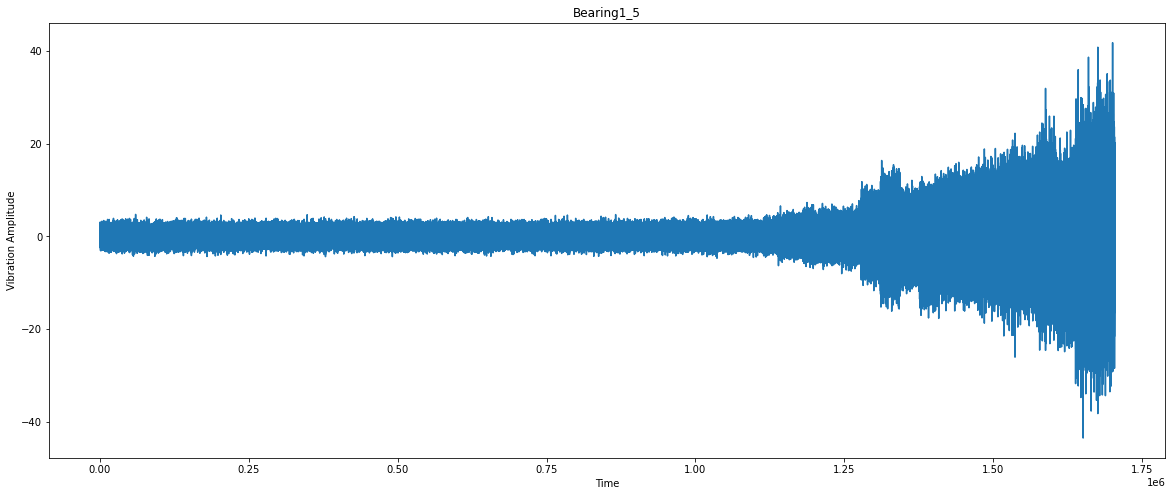

In [129]:
# # path = "/Users/arsal/Library/Containers/2D5AFCD8-9CF7-4F69-A9B0-5A2792076F9F/Data/Documents" 
path = "/Users/arsal/Documents/IOT COE/XJTU-SY-Bearing-Dataset/35Hz12kN/Bearing1_5/"
final = natsorted(os.listdir(path))

vib = []
for i in range(0, len(final)):
    ss = pd.read_csv(path + final[i])
    vib.append(ss['Horizontal_vibration_signals'].values)
signals = np.hstack(vib)
plt.plot(signals)
plt.xlabel('Time')
plt.ylabel('Vibration Amplitude')
plt.title('Bearing1_5')

# Square signal to remove negative values 
* Need to come up with better processing tecnique

Text(0.5, 1.0, 'Bearing1_5')

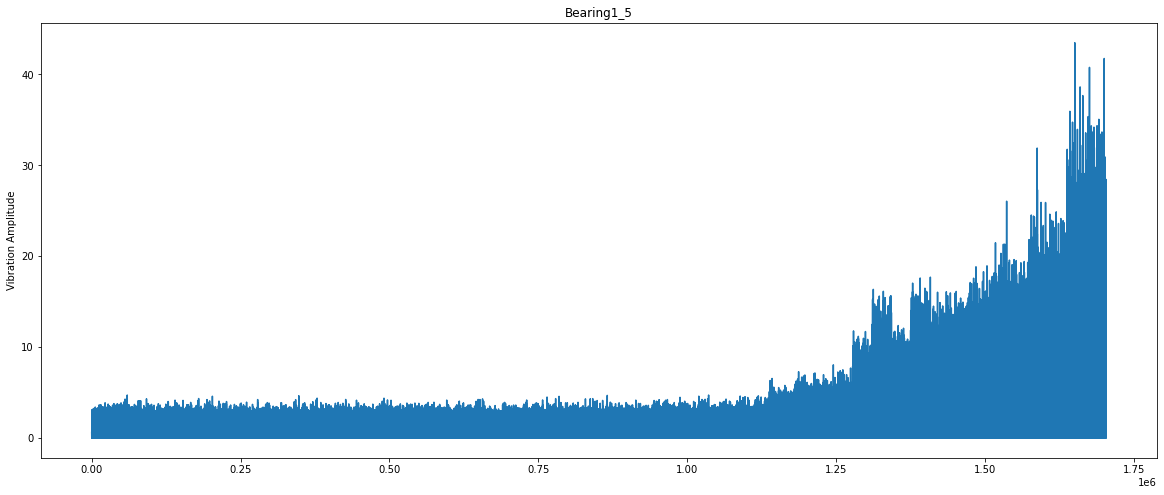

In [134]:
rms = np.sqrt((signals**2))
plt.plot(rms)
plt.ylabel('Vibration Amplitude')
plt.title('Bearing1_5')

# Butterworth Filter 
* Further investigation on filtering techniques required

Text(0.5, 1.0, 'Signal after applying low pass filter')

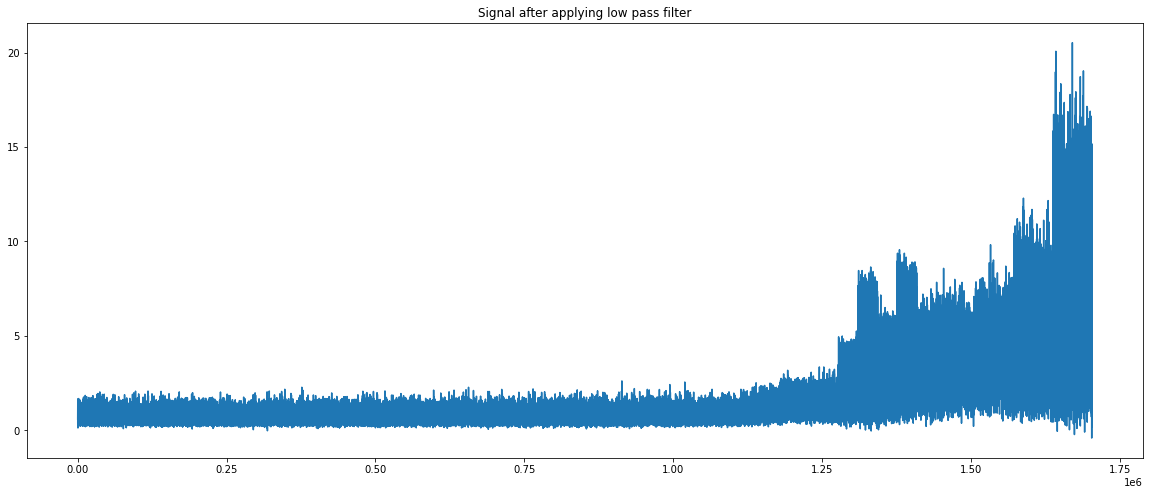

In [135]:
import scipy.signal
b, a = scipy.signal.butter(19, 0.1)
filtered = scipy.signal.filtfilt(b, a, rms)
plt.plot(filtered)
plt.title('Signal after applying low pass filter')

# Moving Average

In [104]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Text(0.5, 1.0, 'Moving Average')

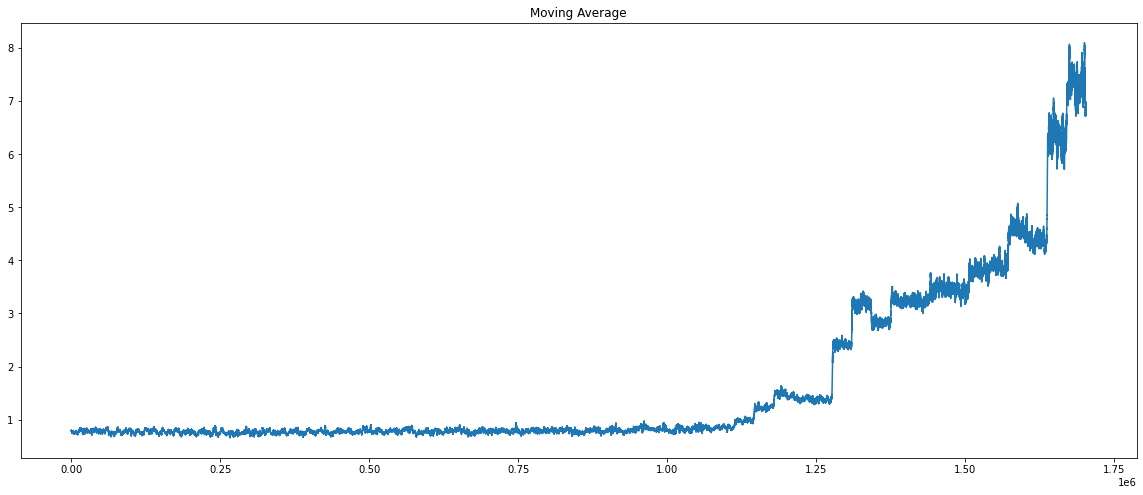

In [141]:
plt.plot(moving_average(rms, 1500))
plt.title('Moving Average')

In [139]:
# windowSize = 20
# window = np.hanning(windowSize)
# window = window / window.sum()

# # filter the data using convolution
# filtered = np.convolve(window, rms, mode='valid')
# plt.plot(filtered)

In [140]:
# plt.plot(np.abs(np.fft.fft(rms)))
# plt.ylim(0, 60000)